## **_Performing 3D Transformations via Matrix Multiplications:_**

# **_Generate a Circle and Experiment with Different Transformation Matrices_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Background:_**

This Python Jupyter notebook consists of suggested extra work to supplement a matrix transformation multiplication coding challenge from Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Instructions:_**

-   Generate **_xy_** coordinates for a circle and plot.

-   Multiply the circle by a **_2x2_** identity matrix and plot. Analyze.

-   Once you have the code for this transformed circle, play around and test with lots of different kinds of **_2x2_** matrices with different elements.

-   Experiment with different varities of **_2x2_** transformation matrices, including a **SINGULAR** Matrix. Plot and analyze.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Code and Visualize with Subplots:_**

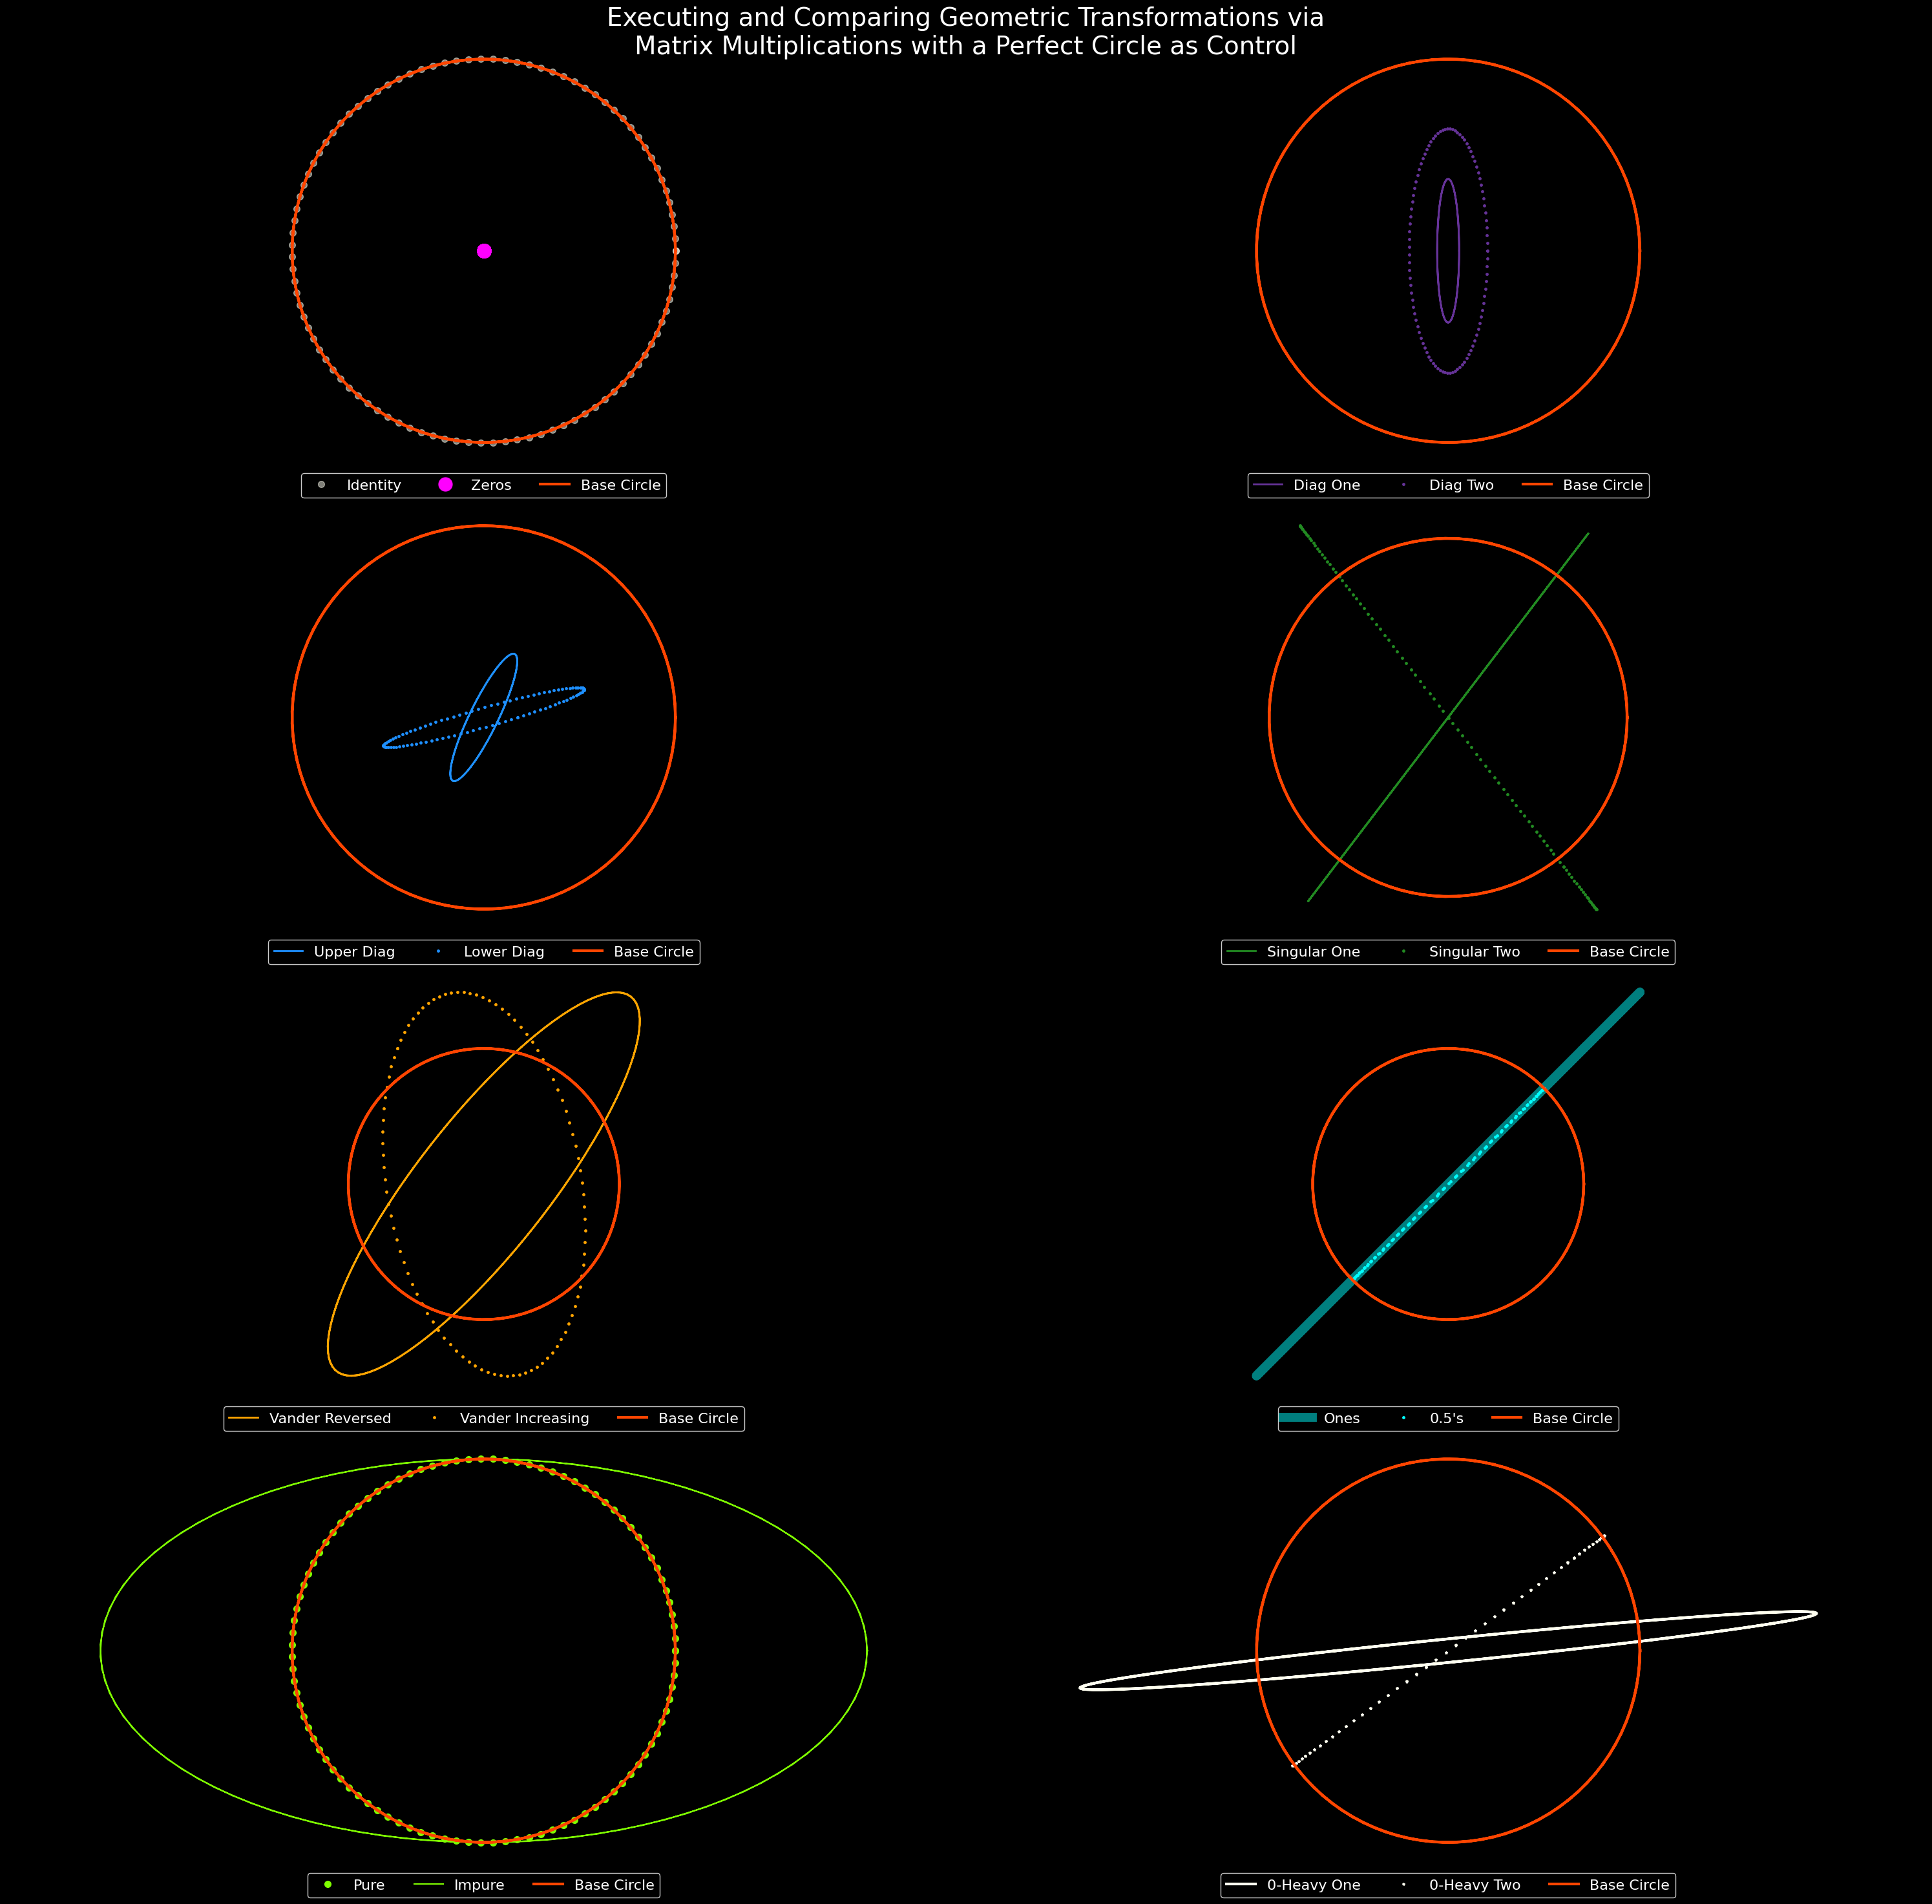

In [10]:
#  ###  #
# Imports:
import matplotlib.pyplot as plt
import numpy as np
from random import choices

#  ###  #
# Set up base circle:
angles = np.linspace(0, 2 * np.pi, 100)
radius = 2


def circle_comp(func):
    """Return circle function call to
    simplify cosine/sine syntax."""
    return func(angles * radius)


# Original circle to use as base in transformations:
XY = np.column_stack((circle_comp(np.cos), circle_comp(np.sin)))

#  ###  #
# Plot everything:
nrows = 4
ncols = 2
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(nrows, ncols, figsize=(30, 30))

    #  ###  #
    # Identity Matrix:
    I = np.eye(2)
    XY_I = XY @ I
    ax[0][0].plot(
        XY_I[:, 0],
        XY_I[:, 1],
        "o",
        c="ivory",
        markersize=7,
        alpha=0.5,
        label="Identity",
    )
    #  ###  #
    # Zeros Matrix:
    Z = np.zeros((2, 2))
    XY_Z = XY @ Z
    ax[0][0].plot(
        XY_Z[:, 0],
        XY_Z[:, 1],
        "o",
        c="fuchsia",
        markersize=15,
        label="Zeros",
    )

    #  ###  #
    # Diagonal Matrices:
    one = np.random.rand(2)
    two = np.random.rand(2)
    D1 = np.diag(one)
    D2 = np.diag(two)
    XY_D1 = XY @ D1
    XY_D2 = XY @ D2
    ax[0][1].plot(
        XY_D1[:, 0],
        XY_D1[:, 1],
        "-",
        c="rebeccapurple",
        lw=2,
        label=f"Diag One",
    )
    ax[0][1].plot(
        XY_D2[:, 0],
        XY_D2[:, 1],
        ".",
        c="rebeccapurple",
        markersize=5,
        alpha=1,
        label=f"Diag Two",
    )

    #  ###  #
    # Upper/Lower Diagonal Matrices:
    S = np.random.rand(2, 2)
    U = np.triu(S)
    L = np.tril(S)
    XY_U = XY @ U
    XY_L = XY @ L
    ax[1][0].plot(
        XY_U[:, 0],
        XY_U[:, 1],
        "-",
        c="dodgerblue",
        lw=2,
        label=f"Upper Diag",
    )
    ax[1][0].plot(
        XY_L[:, 0],
        XY_L[:, 1],
        ".",
        c="dodgerblue",
        markersize=5,
        label=f"Lower Diag",
    )

    #  ###  #
    # Singular Matrices:
    sing_vec_1 = np.random.randn(2)
    SING1 = np.array([sing_vec_1, sing_vec_1 * np.random.randn()])
    sing_vec_2 = np.random.randn(2)
    SING2 = np.array([sing_vec_2, sing_vec_2 * np.random.randn()])
    XY_SING1 = XY @ SING1
    XY_SING2 = XY @ SING2
    ax[1][1].plot(
        XY_SING1[:, 0],
        XY_SING1[:, 1],
        "-",
        c="forestgreen",
        lw=2,
        label="Singular One",
    )
    ax[1][1].plot(
        XY_SING2[:, 0],
        XY_SING2[:, 1],
        ".",
        c="forestgreen",
        markersize=5,
        label="Singular Two",
    )

    #  ###  #
    # Vandermonde Matrices:
    VANDER_REV = np.vander(np.random.randn(2), 2, increasing=False)
    XY_VANDER_REV = XY @ VANDER_REV
    VANDER_INCR = np.vander(np.random.randn(2), 2, increasing=False)
    XY_VANDER_INCR = XY @ VANDER_INCR
    ax[2][0].plot(
        XY_VANDER_REV[:, 0],
        XY_VANDER_REV[:, 1],
        "-",
        c="orange",
        lw=2,
        label="Vander Reversed",
    )
    ax[2][0].plot(
        XY_VANDER_INCR[:, 0],
        XY_VANDER_INCR[:, 1],
        ".",
        c="orange",
        markersize=5,
        label="Vander Increasing",
    )

    #  ###  #
    # Ones and .5's Matrices:
    ONES = np.ones((2, 2))
    XY_ONES = XY @ ONES
    P_FIVES = np.full((2, 2), 0.5)
    XY_P_FIVES = XY @ P_FIVES
    ax[2][1].plot(
        XY_ONES[:, 0],
        XY_ONES[:, 1],
        "-",
        c="aqua",
        lw=10,
        alpha=0.5,
        label="Ones",
    )
    ax[2][1].plot(
        XY_P_FIVES[:, 0],
        XY_P_FIVES[:, 1],
        ".",
        c="aqua",
        markersize=5,
        label="0.5's",
    )

    #  ###  #
    # Pure/Impure Rotation Matrices:
    th = 2 * np.pi
    PURE = np.array([[np.cos(th), np.sin(th)], [np.sin(th), np.cos(th)]])
    XY_PURE = XY @ PURE
    IMPURE = np.array([[2 * np.cos(th), np.sin(th)], [np.sin(th), np.cos(th)]])
    XY_IMPURE = XY @ IMPURE
    ax[3][0].plot(
        XY_PURE[:, 0],
        XY_PURE[:, 1],
        "o",
        c="chartreuse",
        markersize=7,
        label="Pure",
    )
    ax[3][0].plot(
        XY_IMPURE[:, 0],
        XY_IMPURE[:, 1],
        "-",
        c="chartreuse",
        label="Impure",
    )

    #  ###  #
    # ??? Matrices:
    def r(r_type=None, mult=1):
        if r_type == "n":
            output = np.random.randn() * mult
        elif r_type == "i":
            output = np.random.randint(-5, 5) * mult
        else:
            output = np.random.rand() * mult
        return choices([output, 0], weights=[2, 1])[0]

    RAND0_1 = np.array(
        [[r("n", 0.3), r("i", 0.0002)], [r(mult=2.111), r("n", -1.000345)]]
    )
    RAND0_2 = np.array([[r(mult=1.2), r("i", -0.2)], [r("i", mult=0.09), r(mult=0.02)]])
    XY_RAND0_1 = XY @ RAND0_1
    XY_RAND0_2 = XY @ RAND0_2
    ax[3][1].plot(
        XY_RAND0_1[:, 0],
        XY_RAND0_1[:, 1],
        "-",
        c="ivory",
        lw=3,
        label="0-Heavy One",
    )
    ax[3][1].plot(
        XY_RAND0_2[:, 0],
        XY_RAND0_2[:, 1],
        "*",
        c="ivory",
        markersize=3,
        label="0-Heavy Two",
    )

    #  ###  #
    for i in range(nrows):
        for j in range(ncols):
            # Plot the original circle in each axis:
            ax[i][j].plot(
                XY[:, 0],
                XY[:, 1],
                ls="-",
                c="orangered",
                lw=3,
                label="Base Circle",
            )
            # Specify formatted legend for each axis:
            ax[i][j].legend(
                loc="upper center",
                bbox_to_anchor=(0.5, -0.01),
                fancybox=True,
                shadow=True,
                ncol=4,
                fontsize=16,
            )
            # Other axis stuff:
            ax[i][j].axis("equal")
            ax[i][j].axis("off")

    # Build a title:
    title = "Executing and Comparing Geometric Transformations via\n"
    title += "Matrix Multiplications with a Perfect Circle as Control"
    fig.suptitle(title, size=28)

    # Make room:
    plt.tight_layout()
    # Do what's required:
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

## **_Visualize All Together on the Same Axes:_**

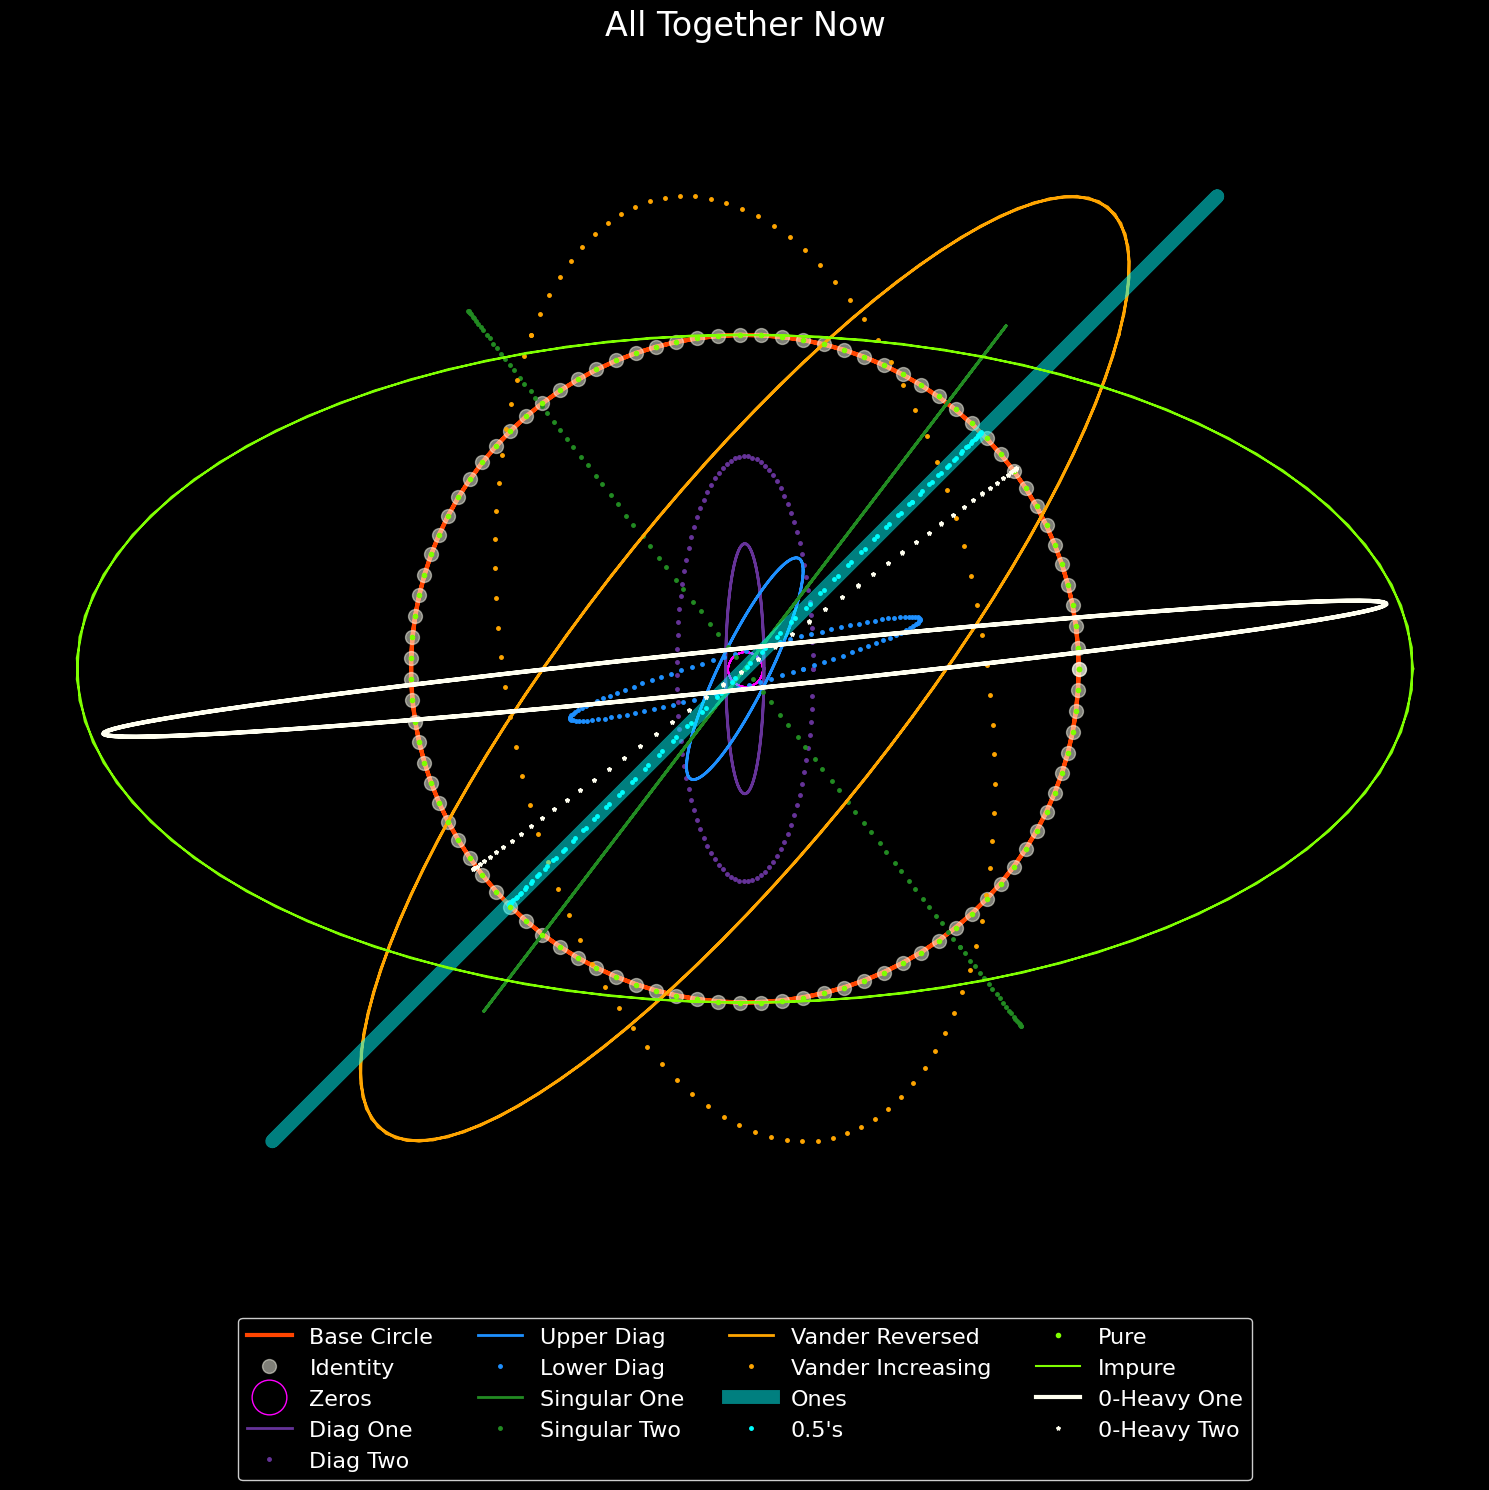

In [11]:
#  ###  #
# All in one subplot:
with plt.style.context("dark_background"):
    plt.figure(figsize=(15, 15))

    plt.plot(
        XY[:, 0],
        XY[:, 1],
        "-",
        c="orangered",
        lw=3,
        label="Base Circle",
    )
    plt.plot(
        XY_I[:, 0],
        XY_I[:, 1],
        "o",
        c="ivory",
        markersize=10,
        alpha=0.5,
        label="Identity",
    )
    plt.plot(
        XY_Z[:, 0],
        XY_Z[:, 1],
        "o",
        c="fuchsia",
        markersize=25,
        fillstyle="none",
        label="Zeros",
    )
    plt.plot(
        XY_D1[:, 0],
        XY_D1[:, 1],
        "-",
        c="rebeccapurple",
        lw=2,
        label=f"Diag One",
    )
    plt.plot(
        XY_D2[:, 0],
        XY_D2[:, 1],
        ".",
        c="rebeccapurple",
        markersize=5,
        alpha=1,
        label=f"Diag Two",
    )
    plt.plot(
        XY_U[:, 0],
        XY_U[:, 1],
        "-",
        c="dodgerblue",
        lw=2,
        label=f"Upper Diag",
    )
    plt.plot(
        XY_L[:, 0],
        XY_L[:, 1],
        ".",
        c="dodgerblue",
        markersize=5,
        label=f"Lower Diag",
    )
    plt.plot(
        XY_SING1[:, 0],
        XY_SING1[:, 1],
        "-",
        c="forestgreen",
        lw=2,
        label="Singular One",
    )

    plt.plot(
        XY_SING2[:, 0],
        XY_SING2[:, 1],
        ".",
        c="forestgreen",
        markersize=5,
        label="Singular Two",
    )

    plt.plot(
        XY_VANDER_REV[:, 0],
        XY_VANDER_REV[:, 1],
        "-",
        c="orange",
        lw=2,
        label="Vander Reversed",
    )
    plt.plot(
        XY_VANDER_INCR[:, 0],
        XY_VANDER_INCR[:, 1],
        ".",
        c="orange",
        markersize=5,
        label="Vander Increasing",
    )
    plt.plot(
        XY_ONES[:, 0],
        XY_ONES[:, 1],
        "-",
        c="aqua",
        lw=10,
        alpha=0.5,
        label="Ones",
    )
    plt.plot(
        XY_P_FIVES[:, 0],
        XY_P_FIVES[:, 1],
        ".",
        c="aqua",
        markersize=5,
        label="0.5's",
    )
    plt.plot(
        XY_PURE[:, 0],
        XY_PURE[:, 1],
        "o",
        c="chartreuse",
        markersize=3,
        label="Pure",
    )
    plt.plot(
        XY_IMPURE[:, 0],
        XY_IMPURE[:, 1],
        "-",
        c="chartreuse",
        label="Impure",
    )

    plt.plot(
        XY_RAND0_1[:, 0],
        XY_RAND0_1[:, 1],
        "-",
        c="ivory",
        lw=3,
        label="0-Heavy One",
    )
    plt.plot(
        XY_RAND0_2[:, 0],
        XY_RAND0_2[:, 1],
        "*",
        c="ivory",
        markersize=3,
        label="0-Heavy Two",
    )

    title = "All Together Now"
    plt.title(title, size=24)

    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.01),
        fancybox=True,
        shadow=True,
        ncol=4,
        fontsize=16,
    )

    plt.axis("equal")
    plt.axis("off")

    # Make room:
    plt.tight_layout()
    # Do what's required:
    plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Conclusions:_**

-   Multiplying a Circle by a **SINGULAR MATRIX** compresses it to one dimension. The resulting 'line' is rotated and stretched based on the values specific to the singular matrix.

-   The transformation by multiplying by a matrix with only one value repeated for all elements has the same flattening effect.

-   Multiplication by an **IDENTITY MATRIX** creates the exact same result/plot as the original matrix (a circle).

-   A **ZEROS MATRIX** clusters all the data at a single point creates in the circle's center.

-   **DIAGONAL MATRICES** cause stretching and compression of the circle, but always within the limits of the original circle's coordinates.

-   Similarly, **UPPER DIAGONAL** and **LOWER DIAGONAL MATRICES** stretch and compress the circle's shape, but the result can overlap/go beyond the original circle's boundaries.

-   More conclusions can be drawn by simply running and witnessing the output subplots in the above visualization, I'll add analysis later.

-   Please add comments if you have more analyses that are helpful!

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Future Project Improvements:_**

-   Discover more varieties of Transformation Matrices.

-   Refine code to make more efficient and cleaner, adding functions or OOP approach.

-   Improve documentation.

-   Explore NumPy and SciPy for other ways of creating/manipulation these data.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>